Datos
=====

A nuestra disposición se encuentra una base de datos en de Access. Dentro de esta nos encontramos con 2 tablas, Dataindsamling y Copy of Dataindsamling. Ambas contienen la misma cantidad de registros, los mismos atributos y los mismos valores, por lo que pasaremos a considerar solo una tabla.



In [30]:
import pandas
import matplotlib.pyplot as plt
import sqlalchemy as sa
import os
import pandas as pd
import numpy as np

In [36]:
db_dir = "datasets\originales\Knogler.accdb"
SQLALCHEMY_DATABASE_URI = os.path.abspath(db_dir).replace("\\", "\\\\")

connection_string = (
    r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};"
    rf"DBQ={SQLALCHEMY_DATABASE_URI};"
    r"ExtendedAnsiSQL=1;"
)
connection_url = sa.engine.URL.create(
    "access+pyodbc",
    query={"odbc_connect": connection_string}
)

engine = sa.create_engine(connection_url)
df = pandas.read_sql("SELECT * FROM Dataindsamling", engine)

print(df.head())

   ID Location Site_Number  Age_Minumum  Age_Maximum   Sex Grave Number  \
0   1     Ribe     ASR1015         20.0         24.0  Male          G40   
1   4     Ribe     ASR1015         35.0         45.0  Male         G312   
2   5     Ribe     ASR1015         50.0         60.0  Male         G229   
3   6     Ribe     ASR1015         30.0         40.0  Male         G257   
4   7     Ribe     ASR1015         45.0         55.0  Male          G74   

   Canine number  Canine largest age  Canine 2nd largest age  ...  \
0            2.0                 3.0                     5.0  ...   
1            3.0                 4.0                     4.5  ...   
2            0.0                 0.0                     0.0  ...   
3            NaN                 NaN                     NaN  ...   
4            NaN                 NaN                     NaN  ...   

   Height in grave                            Abnormalities Vertebras  \
0            173.5                                           

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       117 non-null    int64         
 1   Location                 117 non-null    object        
 2   Site_Number              117 non-null    object        
 3   Age_Minumum              117 non-null    float64       
 4   Age_Maximum              110 non-null    float64       
 5   Sex                      115 non-null    object        
 6   Grave Number             117 non-null    object        
 7   Canine number            89 non-null     float64       
 8   Canine largest age       83 non-null     float64       
 9   Canine 2nd largest age   76 non-null     float64       
 10  Incisor number           77 non-null     float64       
 11  Incisor largest age      75 non-null     float64       
 12  Incisor 2nd largest age  72 non-null

Existen 23 atributos. Veamos en la literatura una descripción de los datos:

- **ID**: Identificador único de cada registro.
- **Location**: Ubicación de la muestra.
- **Site_Number**: Número de sitio.
- **Age_Minimum**: Edad mínima de la muestra.
- **Age_Maximum**: Edad máxima de la muestra.
- **Sex**: Sexo de la muestra.
- **Grave Number**: Número de tumba.
- **Canine Number**: Número de hipoplásias visibles en el canino.
- **Canine largest age**: Edad a la que se formo la hipoplasia en el primer canino más grandes.
- **Canine 2nd largest age**: Edad a la que se formo la hipoplasia en el segundo canino más grandes.
- **Incisor Number**: Número de hipoplásias visibles en el incisivo.
- **Incisor largest age**: Edad a la que se formo la hipoplasia en el primer incisivo más grandes.
- **Incisor 2nd largest age**: Edad a la que se formo la hipoplasia en el segundo incisivo más grandes.
- **Height in Grave**: Altura en la tumba.
- **Abnormalities Vertebras**: Anormalidades notadas que pudieran haber impactado la altura en vida.
- **Femur left**: Longitud máxima del fémur izquierdo en cm.
- **Femur right**: Longitud máxima del fémur derecho en cm.
- **Abnormalities Femur**: Anormalidades notadas que pudieran haber impactado la altura medida en la tumba.
- **Notes**: Notas adicionales de interés.
- **Date**: Fecha de registro.
- **Signature**: Firma de la persona que recolecto la información.
- **Hipoplásia**:  Marcado si se encontro hipoplásia en la dentadura.
- **Teeth Scorable**: Marcado si el estado de los dientes es lo suficientemente bueno para analizar hipoplásias.

## Estadistica

Investiguemos la distribuciones de los distintos atributos, y su estadistica descriptiva.

In [33]:
data_df = df.drop(['ID', 'Location', 'Site_Number', 'Grave Number', 'Notes', 'Date', 'Signature'], axis=1)

In [34]:
statistic = pd.DataFrame([], index=['mean', 'std', 'min', 'max', 'median', 'mising'])
for column in statistic.columns:
    statistic[column] = statistic[column].astype('float')

for column in data_df.columns:
    if data_df[column].dtype in ('object', 'category', 'string'):
        statistic[column] = [np.nan] * 5 + [data_df[column].isna().sum()]
        continue

    if data_df[column].isna().all():
        statistic[column] = [np.nan] * 5 + [len(data_df[column])]
        continue

    statistic[column] = [
        data_df[column].mean(),
        data_df[column].std(),
        data_df[column].min(),
        data_df[column].max(),
        data_df[column].median(),
        np.isnan(data_df[column]).sum()
    ]
statistic = statistic.T
print(statistic)
print('\n')

                               mean        std    min    max median mising
Age_Minumum               34.794872  10.675091   18.0   60.0   35.0    0.0
Age_Maximum               43.309091  11.877622   20.0   70.0   45.0    7.0
Sex                             NaN        NaN    NaN    NaN    NaN    2.0
Canine number              1.550562   1.883006    0.0    8.0    1.0   28.0
Canine largest age         2.024096   1.969127    0.0    5.0    2.5   34.0
Canine 2nd largest age     1.890789   2.010849    0.0    5.0    0.5   41.0
Incisor number             1.584416   2.123494    0.0    7.0    0.0   40.0
Incisor largest age            1.24   1.457413    0.0    4.0    0.0   42.0
Incisor 2nd largest age    1.144444   1.491184    0.0    4.0    0.0   45.0
Height in grave          159.852991  23.246099    0.0  185.0  161.0    0.0
Abnormalities Vertebras         NaN        NaN    NaN    NaN    NaN  104.0
Femur left                42.504348  12.718663    0.0   54.4   45.1   25.0
Femur right              

Dada la cantidad de ejemplos, podemos ver algunos atributos con muchos datos faltantes. Estos son:

- **Abnormalities Vertebras**
- **Abnormalities Femur**

Estos atributos se pasan de 100 datos faltantes, para un conjunto de 117 ejemplos. Por otro lado, los atributos:

- **Canine 2nd largest age**
- **Incisor Number**
- **Incisor largest age**
- **Incisor 2nd largest age**

Tienen mas de 40 datos faltantes, resultando ser de preocupacion. Veremos mas adelante en el preprocesamiento de los datos que hacemos con ellos.

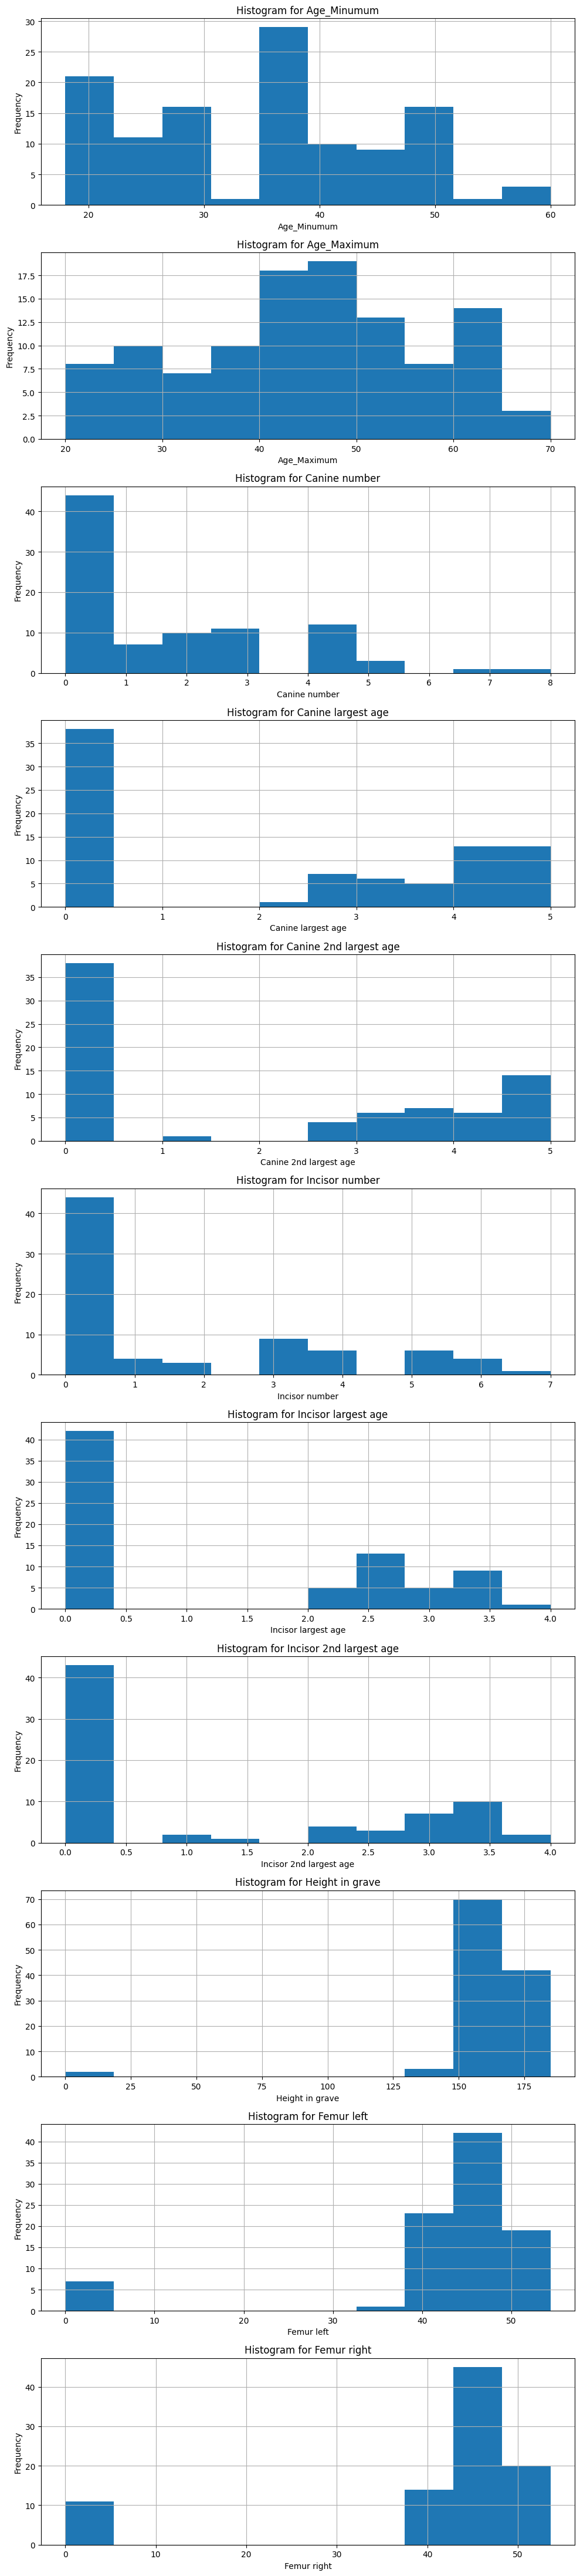

In [35]:
num_columns = len(data_df.select_dtypes(include=['number']).columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(10, 4 * num_columns))

for col, ax in zip(data_df.select_dtypes(include=['number']).columns, axes):
    data_df[col].hist(ax=ax)
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Analizando las distribuciones de los datos, podemos ver que varios de ellos presentan una distribución normal, o al menos se asemejan fuera del valores en 0, aunque no todos lo hacen.

## Selección de Algoritmo

Con el anterior análisis, nos encontramos con un problema de regresión donde el valor de una variable continua, la altura, es estimada a partir de otras variables continuas y discretas numéricas. Por lo tanto, podemos presumir lo siguiente:

- **Regresión lineal**: Es un buen candidato, ya que el problema es de regresión, y los datos parecen tener una distribución normal.
- **Regresión logística**: No es un buen candidato, ya que el problema es de regresión, y la variable a predecir no es binaria.
- **Análisis discriminante lineal**: Utilizado para clasificación con variables de salida multi clase, no es un buen candidato.
- **kNN**: Se puede utilizar para regresión, con alguna modificación.
- **Naive Bayes**: No es un buen candidato, ya que el varias de las variables de entrada no son discretas y precisarían de una discretización.

Partiendo de estas observaciones, utilizaremos un modelo de regresión lineal y mediremos su desempeño, tanto en Python como en RapidMiner.
